In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 1
myDF = pd.read_csv('assign04.csv')
# 2
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [6]:
#3
df_temp = myDF.drop('Model', axis=1)
df_temp.head(3)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America


In [7]:
#4
myDF.drop('Model', axis=1, inplace=True)
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America


In [8]:
#5
myDF.drop([1, 3, 5], axis=0, inplace=True)
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa


In [9]:
#6
dfRange = myDF['Range'].mean()
print(dfRange)

297.53326293558604


In [10]:
#7
f_count = myDF['Type'].value_counts().get('F', 0)
print(f"Number of 'F' in 'Type' column: {f_count}")

# Replace 'F' with 'AAA' permanently
myDF['Type'].replace('F', 'AAA', inplace=True)

# Show the first 5 rows
print(myDF.head(5))

Number of 'F' in 'Type' column: 50
   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50  AAA   NXEYEM  [56$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
4  50    468     33    J   HPQCMC  [95$]         Africa
6  70    327     24  AAA   NLVQPY  [25$]         Europe
7  80    495     50    Z   DLUMAX  [70$]     Antarctica


<ipython-input-10-95fbe0db4498>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  myDF['Type'].replace('F', 'AAA', inplace=True)


In [13]:
#8
myDF['Cost'] = myDF['Cost'].replace(r'[\[\]\$]', '', regex=True)

print(myDF.head(5))

# Check the type of the 'Cost' column after cleaning
print(f"Type of 'Cost' column: {myDF['Cost'].dtype}")

   ID  Range  Value Type Zip Code Cost      Continent
0  10    192     50  AAA   NXEYEM   56           Asia
2  30    378     28    X   IMGMFY   90  North America
4  50    468     33    J   HPQCMC   95         Africa
6  70    327     24  AAA   NLVQPY   25         Europe
7  80    495     50    Z   DLUMAX   70     Antarctica
Type of 'Cost' column: object


In [14]:
#9
myDF['Cost'] = myDF['Cost'].astype(int)
print(myDF['Cost'].dtype)

int64


In [16]:
#10
costAvg = myDF['Cost'].mean()
print(costAvg)

54.586061246040124


In [17]:
#10
continent_avg_cost = myDF.groupby('Continent')['Cost'].mean()
print(continent_avg_cost)

Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64


In [19]:
#11
cost_stats = myDF.groupby('Continent')['Cost'].agg(['min', 'max', 'mean'])
print(cost_stats)

               min  max       mean
Continent                         
Africa          11   97  54.741259
Antarctica      10   97  54.706897
Asia            10   99  54.279070
Australia       10   97  56.838028
Europe          10   99  53.258993
North America   10   99  55.006993
South America   10   98  53.162963


In [26]:
#12
numerical_stats = myDF.select_dtypes(include=['number']).groupby(myDF['Continent']).agg(['min', 'max', 'std'])

# Show the result
print(numerical_stats)

                ID                    Range                  Value      \
               min   max          std   min  max         std   min max   
Continent                                                                
Africa          50  9450  2614.387519   100  494  118.110406    10  50   
Antarctica      80  9370  2936.313786   106  495  114.401370    10  50   
Asia            10  9390  2683.431665   103  499  112.047425    10  50   
Australia      120  9410  2793.945560   104  496  116.374530    10  50   
Europe          70  9480  2623.991892   101  500  116.808685    10  50   
North America   30  9490  2841.216413   104  500  113.611333    11  50   
South America   90  9500  2656.186804   104  499  117.375623    10  50   

                         Cost                 
                     std  min max        std  
Continent                                     
Africa         12.498931   11  97  25.961432  
Antarctica     11.978316   10  97  24.880590  
Asia           11.752819

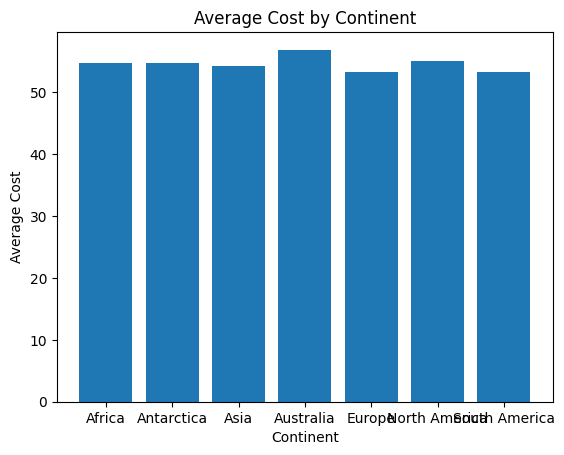

In [29]:
#13
numerical_min = myDF.select_dtypes(include=['number']).groupby(myDF['Continent']).mean()
plt.bar(numerical_min.index, numerical_min['Cost'])
plt.xlabel('Continent')
plt.ylabel('Average Cost')
plt.title('Average Cost by Continent')
plt.show()

In [30]:
#14
myDF['Continent'].value_counts()

,count
Continent,
North America,143
Africa,143
Australia,142
Europe,139
South America,135
Asia,129
Antarctica,116


In [31]:
#15
myDF['Continent'].value_counts(normalize=True) * 100

,proportion
Continent,
North America,15.100317
Africa,15.100317
Australia,14.994720
Europe,14.677930
South America,14.255544
Asia,13.621964
Antarctica,12.249208


In [32]:
#16
myDF['Continent'].unique()

array(['Asia', 'North America', 'Africa', 'Europe', 'Antarctica',
       'South America', 'Australia'], dtype=object)

In [33]:
#16
myDF['Continent'].nunique()

7

In [34]:
#17
myDF['Cost'].value_counts()

,count
Cost,
56,20
35,20
73,18
54,17
97,17
...,...
18,5
94,5
22,5


In [35]:
## Basically value_counts() gives you the quantity of the numbers exists in one column.
## For example at the top we have 20 rows in that have (56) value in the Cost column

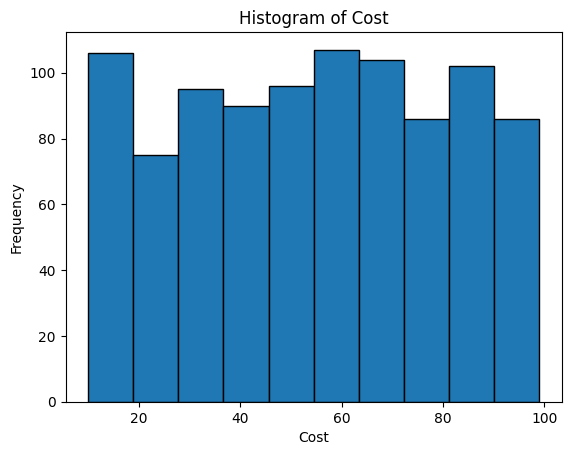

In [37]:
#18
plt.hist(myDF['Cost'], edgecolor='black')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Cost')
plt.show()
#

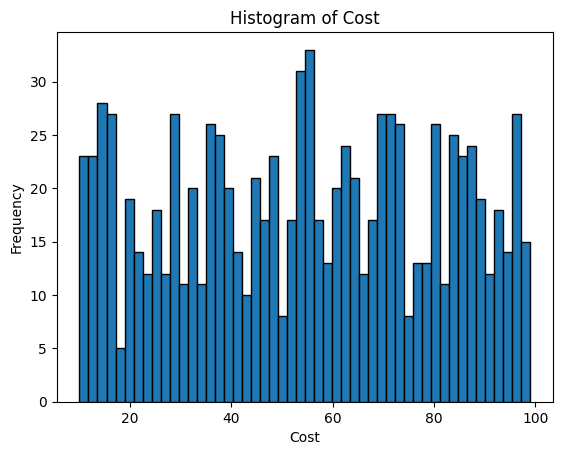

In [38]:
#19
plt.hist(myDF['Cost'], edgecolor='black', bins=50)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Cost')
plt.show()

In [41]:
#20
zip_code_missing = myDF['Zip Code'].isnull().sum()
type_missing = myDF['Type'].isnull().sum()

print(zip_code_missing)
print(type_missing)

9
2


In [42]:
#20
myDF.isnull().sum()

,0
ID,0
Range,0
Value,0
Type,2
Zip Code,9
Cost,0
Continent,0


In [44]:
#21
myDF.dropna(inplace=True)
len(myDF)

936

In [45]:
#22
myDF['Type'].value_counts()
## will have no NAN because I already dropped the null values from the dataset

,count
Type,
AAA,50
N,46
Q,44
Z,43
C,43
K,40
A,40
Y,39
V,39


In [47]:
#23
myDF['Type'].fillna('XXX')
myDF['Type'].value_counts()

,count
Type,
AAA,50
N,46
Q,44
Z,43
C,43
K,40
A,40
Y,39
V,39


In [48]:
#24
# Already did in the step 21

In [59]:
#25
# Set 'ID' column as the index

# Remove the index name
myDF.index.name = None

# Show the first 5 rows
print("First 5 rows of the DataFrame:")
print(myDF.head())

# Access the value where ID=70 and column='Value'
value_at_70 = myDF.loc[70, 'Value']
print(f"\nValue of the cell where ID=70 and column='Value': {value_at_70}")

First 5 rows of the DataFrame:
    Range  Value Type Zip Code  Cost      Continent
10    192     50  AAA   NXEYEM    56           Asia
30    378     28    X   IMGMFY    90  North America
50    468     33    J   HPQCMC    95         Africa
70    327     24  AAA   NLVQPY    25         Europe
80    495     50    Z   DLUMAX    70     Antarctica

Value of the cell where ID=70 and column='Value': 24


In [61]:
#26
print("Before resetting the index:")
print("Index:", myDF.index)
print("Columns:", myDF.columns)
print("Shape:", myDF.shape)

df_reset = myDF.reset_index()

# Show the index, columns, and shape after resetting the index
print("\nAfter resetting the index:")
print("Index:", df_reset.index)
print("Columns:", df_reset.columns)
print("Shape:", df_reset.shape)

Before resetting the index:
Index: Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
       ...
       9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
      dtype='int64', length=936)
Columns: Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
Shape: (936, 6)

After resetting the index:
Index: RangeIndex(start=0, stop=936, step=1)
Columns: Index(['index', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
Shape: (936, 7)


In [63]:
#27
df_description = myDF.describe()

# Fetch the value of the first row and third column of the result
value_first_row_third_column = df_description.iloc[0, 2]

print(df_description)
print(value_first_row_third_column)

            Range       Value        Cost
count  936.000000  936.000000  936.000000
mean   297.518162   29.897436   54.616453
std    116.027425   12.297043   25.763991
min    100.000000   10.000000   10.000000
25%    194.000000   19.000000   33.000000
50%    295.000000   30.000000   55.000000
75%    400.000000   41.000000   76.000000
max    500.000000   50.000000   99.000000
936.0


In [64]:
continent_counts_sorted_by_freq = myDF['Continent'].value_counts()

# Get the value counts for the 'Continent' column and sort alphabetically
continent_counts_sorted_by_alpha = myDF['Continent'].value_counts(sort=False).sort_index()

# Display the results
print("Value counts sorted by frequency:")
print(continent_counts_sorted_by_freq)

print("\nValue counts sorted alphabetically:")
print(continent_counts_sorted_by_alpha)

Value counts sorted by frequency:
Continent
North America    141
Australia        141
Africa           138
Europe           138
South America    134
Asia             129
Antarctica       115
Name: count, dtype: int64

Value counts sorted alphabetically:
Continent
Africa           138
Antarctica       115
Asia             129
Australia        141
Europe           138
North America    141
South America    134
Name: count, dtype: int64


In [66]:
rows_selected = myDF.iloc[[1, 3, 5, 7]]

# Show the first 7 rows of the 'Type' and 'Continent' columns
columns_selected = myDF.loc[:6, ['Type', 'Continent']]

# Display the results
print("Rows [1, 3, 5, 7]:")
print(rows_selected)

print("\nFirst 7 rows of 'Type' and 'Continent' columns:")
print(columns_selected)

Rows [1, 3, 5, 7]:
     Range  Value Type Zip Code  Cost      Continent
30     378     28    X   IMGMFY    90  North America
70     327     24  AAA   NLVQPY    25         Europe
90     115     30    S   KYJUHA    17  South America
110    301     29    A   OVINZU    69  South America

First 7 rows of 'Type' and 'Continent' columns:
Empty DataFrame
Columns: [Type, Continent]
Index: []


In [68]:
value_of_type_xxx = myDF[myDF['Type'] == 'XXX']['Value']

# Display the result
print(value_of_type_xxx)

Series([], Name: Value, dtype: int64)


In [69]:
# In the Step 23, I have already dropped the rows with missing values, therefore,
# I was unable to assign them with XXX. However, the output shows the correct answer
# since I have no row with XXX value.